# In-vehicle coupon recommendation

This data was collected via a survey on Amazon Mechanical Turk. 
The survey describes different driving scenarios including the destination, current time, weather, passenger, etc 
and then ask the person whether he will accept the coupon if he is the driver. 
For more information about the dataset, please refer to the paper
Wang, Tong, Cynthia Rudin, Finale Doshi-Velez, Yimin Liu, Erica Klampfl, and Perry MacNeille. 
A bayesian framework for learning rule sets for interpretable classification.
The Journal of Machine Learning Research 18, no. 1 (2017): 2357-2393.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Dataset

In [2]:
import io
%cd "C:\Users\sande\OneDrive\Desktop\New folder (2)"

C:\Users\sande\OneDrive\Desktop\New folder (2)


In [3]:
invehicle=pd.read_csv("invehicle.csv")

# Dataset information

In [4]:
invehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
invehicle=invehicle.drop("car",axis=1)

In [6]:
invehicle=invehicle.drop("toCoupon_GEQ5min",axis=1)

In [7]:
invehicle.Bar.value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

# Imputing the missing Values

In [8]:
invehicle.Bar=invehicle.Bar.fillna(invehicle.Bar.value_counts().idxmax())

In [9]:
invehicle.CoffeeHouse.value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [10]:
invehicle.CoffeeHouse=invehicle.CoffeeHouse.fillna(invehicle.CoffeeHouse.value_counts().idxmax())

In [11]:
invehicle.CarryAway.value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [12]:
invehicle.CarryAway=invehicle.CarryAway.fillna(invehicle.CarryAway.value_counts().idxmax())

In [13]:
invehicle.RestaurantLessThan20.value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [14]:
invehicle.RestaurantLessThan20=invehicle.RestaurantLessThan20.fillna(invehicle.RestaurantLessThan20.value_counts().idxmax())

In [15]:
invehicle.Restaurant20To50.value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [16]:
invehicle.Restaurant20To50=invehicle.Restaurant20To50.fillna(invehicle.Restaurant20To50.value_counts().idxmax())

In [17]:
invehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

# EDA-Exploratory data analysis

<Axes: >

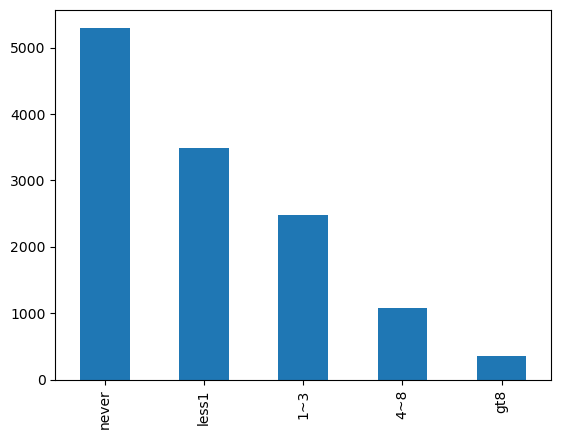

In [18]:
invehicle.Bar.value_counts().plot(kind='bar')

<Axes: ylabel='Y'>

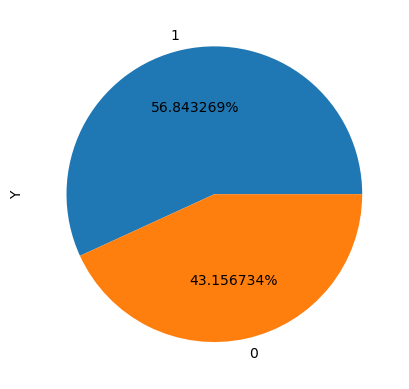

In [19]:
invehicle.Y.value_counts().plot(kind='pie',autopct='%2f%%')

<Axes: ylabel='education'>

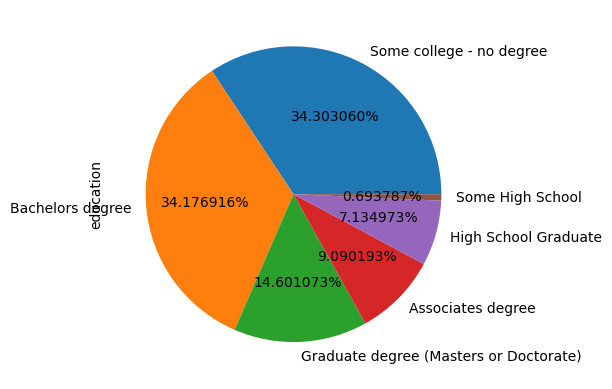

In [20]:
invehicle.education.value_counts().plot(kind='pie',autopct='%2f%%')

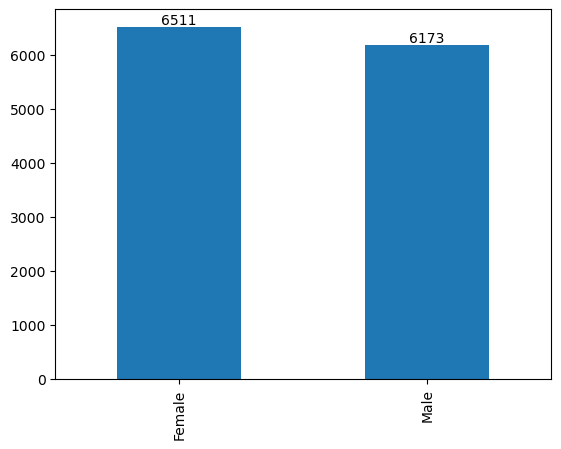

In [21]:
ax=invehicle.gender.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

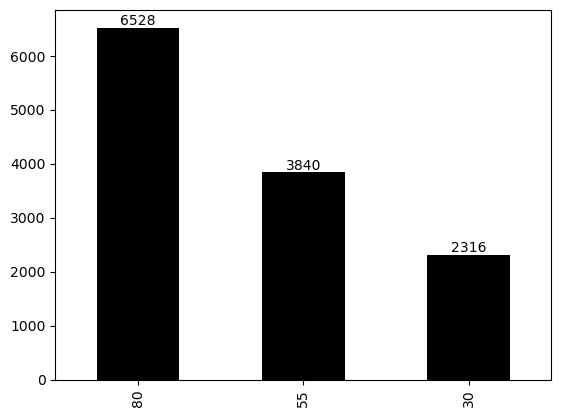

In [22]:
ax=invehicle.temperature.value_counts().plot(kind='bar',color='black')
for i in ax.containers:
    ax.bar_label(i)

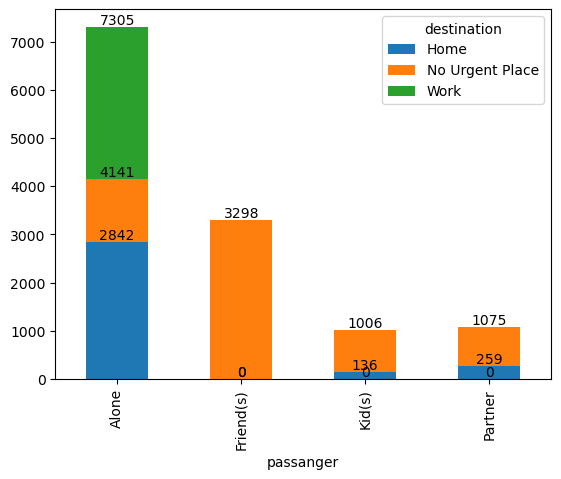

In [23]:
ax=pd.crosstab(invehicle.passanger,invehicle.destination).plot(
kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

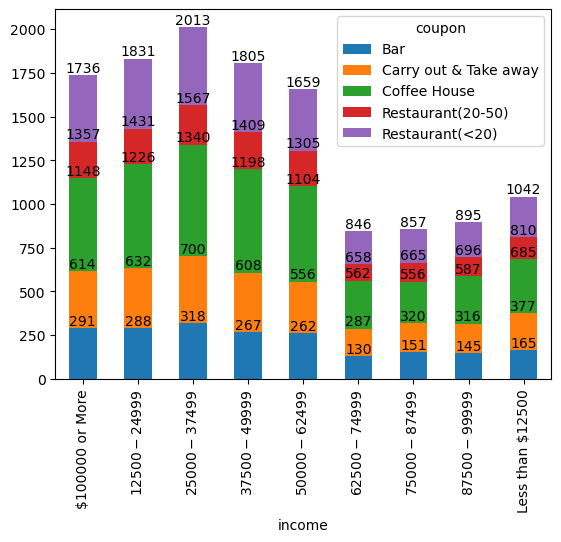

In [24]:
ax=pd.crosstab(invehicle.income,invehicle.coupon).plot(
kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

In [25]:
import seaborn as sns

<Figure size 3000x1500 with 0 Axes>

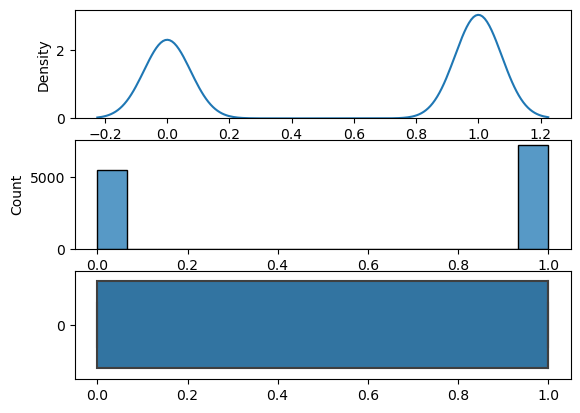

In [26]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.kdeplot(invehicle.Y,ax=ax[0])
sns.histplot(invehicle.Y,ax=ax[1])
sns.boxplot(invehicle.Y,ax=ax[2],orient='h')
plt.show()

# Hypothesis Testing

In [27]:
# Test Null no Association between Y and gender
pd.crosstab(invehicle.Y,invehicle.gender)

gender,Female,Male
Y,,
0,2948,2526
1,3563,3647


In [28]:
from scipy.stats import chi2_contingency

In [29]:
chi2_contingency(pd.crosstab(invehicle.Y,invehicle.gender))
# since pvalue=8.05552865589407e-07 is less than 0.05, Reject NULL

Chi2ContingencyResult(statistic=24.344527038622925, pvalue=8.05552865589407e-07, dof=1, expected_freq=array([[2809.93487859, 2664.06512141],
       [3701.06512141, 3508.93487859]]))

In [30]:
# Test Null no Association between Y and destination
pd.crosstab(invehicle.Y,invehicle.destination)

destination,Home,No Urgent Place,Work
Y,,,
0,1598,2301,1575
1,1639,3982,1589


In [31]:
chi2_contingency(pd.crosstab(invehicle.Y,invehicle.destination))
# since pvalue=8.40265678045787e-48 is less than 0.05, Reject NULL

Chi2ContingencyResult(statistic=216.79107304896826, pvalue=8.40265678045787e-48, dof=2, expected_freq=array([[1396.98344371, 2711.53752759, 1365.4790287 ],
       [1840.01655629, 3571.46247241, 1798.5209713 ]]))

In [32]:
# Test Null no Association between Y and maritalStatus
pd.crosstab(invehicle.Y,invehicle.maritalStatus)

maritalStatus,Divorced,Married partner,Single,Unmarried partner,Widowed
Y,,,,,
0,243,2331,1873,959,68
1,273,2769,2879,1227,62


In [33]:
chi2_contingency(pd.crosstab(invehicle.Y,invehicle.maritalStatus))
# since pvalue=6.48964798323251e-10 is less than 0.05, Reject NULL

Chi2ContingencyResult(statistic=48.77999591154126, pvalue=6.48964798323251e-10, dof=4, expected_freq=array([[ 222.68874172, 2200.99337748, 2050.80794702,  943.40618102,
          56.10375276],
       [ 293.31125828, 2899.00662252, 2701.19205298, 1242.59381898,
          73.89624724]]))

In [34]:
# Test Null no Association between Y and income
pd.crosstab(invehicle.Y,invehicle.income)

income,$100000 or More,$12500 - $24999,$25000 - $37499,$37500 - $49999,$50000 - $62499,$62500 - $74999,$75000 - $87499,$87500 - $99999,Less than $12500
Y,,,,,,,,,
0,732,779,819,787,671,400,443,419,424
1,1004,1052,1194,1018,988,446,414,476,618


In [35]:
chi2_contingency(pd.crosstab(invehicle.Y,invehicle.income))
# since pvalue=4.30446851198096e-08 is less than 0.05, Reject NULL

Chi2ContingencyResult(statistic=49.88268726622557, pvalue=4.30446851198096e-08, dof=8, expected_freq=array([[ 749.200883  ,  790.19977925,  868.74503311,  778.9790287 ,
         715.97019868,  365.10596026,  369.85320088,  386.25275938,
         449.69315673],
       [ 986.799117  , 1040.80022075, 1144.25496689, 1026.0209713 ,
         943.02980132,  480.89403974,  487.14679912,  508.74724062,
         592.30684327]]))

In [36]:
# Test Null no Association between Y and weather
pd.crosstab(invehicle.Y,invehicle.weather)

weather,Rainy,Snowy,Sunny
Y,,,
0,650,744,4080
1,560,661,5989


In [37]:
chi2_contingency(pd.crosstab(invehicle.Y,invehicle.weather))
# since pvalue=8.312207740720093e-31 is less than 0.05, Reject NULL

Chi2ContingencyResult(statistic=138.5248252729253, pvalue=8.312207740720093e-31, dof=2, expected_freq=array([[ 522.19646799,  606.35209713, 4345.45143488],
       [ 687.80353201,  798.64790287, 5723.54856512]]))

In [38]:
invehicle.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [39]:
invehicle_dummy=pd.get_dummies(invehicle,columns=['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp'])

# Getting Dummies

In [40]:
invehicle_dummy.head()

,Y,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,...,Restaurant20To50_less1,Restaurant20To50_never,toCoupon_GEQ15min_0,toCoupon_GEQ15min_1,toCoupon_GEQ25min_0,toCoupon_GEQ25min_1,direction_same_0,direction_same_1,direction_opp_0,direction_opp_1
0,1,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1
2,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1


In [41]:
invehicle_dummy.shape

(12684, 116)

# Spliting Data into X And Y For Data Modules

In [42]:
y=invehicle_dummy.Y
x=invehicle_dummy.drop('Y',axis=1)

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
y=LabelEncoder().fit_transform(y)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.30,
                                               random_state=42)

In [47]:
pd.DataFrame(y_train).value_counts()

1    5053
0    3825
dtype: int64

In [48]:
pd.DataFrame(y_test).value_counts()

1    2157
0    1649
dtype: int64

# LogisticRegression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logit=LogisticRegression()

In [51]:
logitmodel=logit.fit(x_train,y_train)

In [52]:
logitmodel.score(x_train,y_train)

0.6947510700608245

In [53]:
from sklearn.metrics import classification_report, RocCurveDisplay

In [54]:
print(classification_report(y_train,logitmodel.predict(x_train)))

              precision    recall  f1-score   support

           0       0.67      0.59      0.62      3825
           1       0.71      0.78      0.74      5053

    accuracy                           0.69      8878
   macro avg       0.69      0.68      0.68      8878
weighted avg       0.69      0.69      0.69      8878



# cross_val_score

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
np.mean(cross_val_score(logit,x_train,y_train))

C:\Users\sande\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6843885928181703

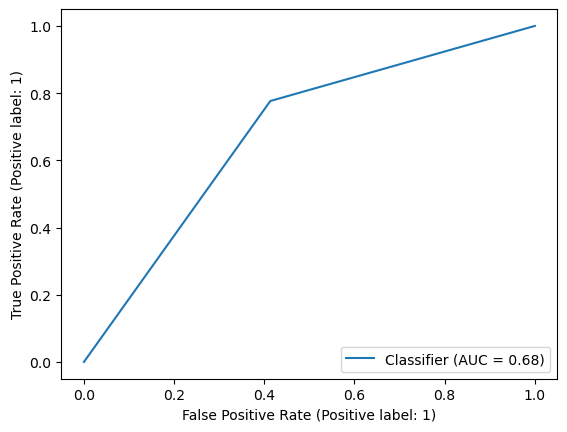

In [57]:
RocCurveDisplay.from_predictions(y_train,logitmodel.predict(x_train))

# CategoricalNB

In [58]:
from sklearn.naive_bayes import CategoricalNB

In [59]:
nb=CategoricalNB()

In [60]:
nb_model=nb.fit(x_train,y_train)

In [61]:
nb_model.score(x_train,y_train)

0.6637756251407975

In [62]:
np.mean(cross_val_score(nb,x_train,y_train))

0.6590438396142622

In [63]:
print(classification_report(y_train,nb_model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.62      0.57      0.60      3825
           1       0.69      0.73      0.71      5053

    accuracy                           0.66      8878
   macro avg       0.66      0.65      0.65      8878
weighted avg       0.66      0.66      0.66      8878



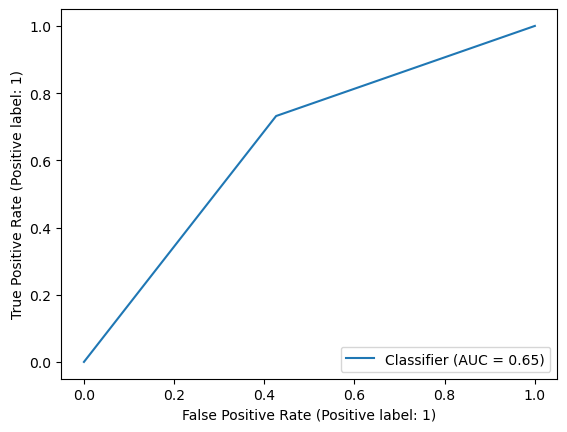

In [64]:
RocCurveDisplay.from_predictions(y_train,nb_model.predict(x_train))

# DecisionTreeClassifier

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dt=DecisionTreeClassifier(max_depth=6)

In [67]:
dt_model=dt.fit(x_train,y_train)

In [68]:
dt_model.score(x_train,y_train)

0.7081549898625816

In [69]:
np.mean(cross_val_score(dt,x_train,y_train))

0.6939623778708286

In [70]:
print(classification_report(y_train,dt_model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      3825
           1       0.74      0.74      0.74      5053

    accuracy                           0.71      8878
   macro avg       0.70      0.70      0.70      8878
weighted avg       0.71      0.71      0.71      8878



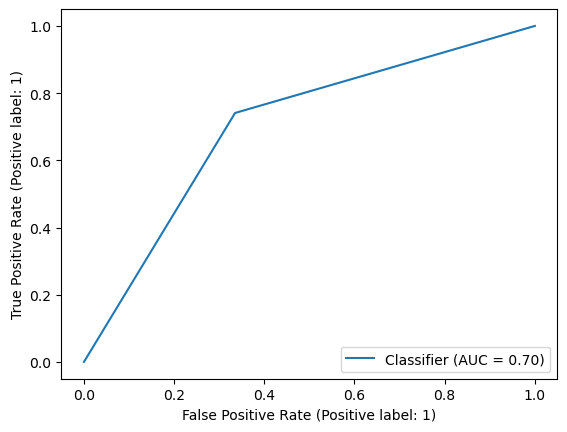

In [71]:
RocCurveDisplay.from_predictions(y_train,dt_model.predict(x_train))

# RandomForestClassifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf=RandomForestClassifier(n_estimators=1000,max_depth=6)

In [74]:
rf_model=rf.fit(x_train,y_train)

In [75]:
rf_model.score(x_train,y_train)

0.7211083577382293

In [76]:
np.mean(cross_val_score(rf,x_train,y_train))

0.6977924755741657

In [77]:
print(classification_report(y_train,rf_model.predict(x_train)))

              precision    recall  f1-score   support

           0       0.78      0.49      0.60      3825
           1       0.70      0.90      0.79      5053

    accuracy                           0.72      8878
   macro avg       0.74      0.69      0.69      8878
weighted avg       0.73      0.72      0.71      8878



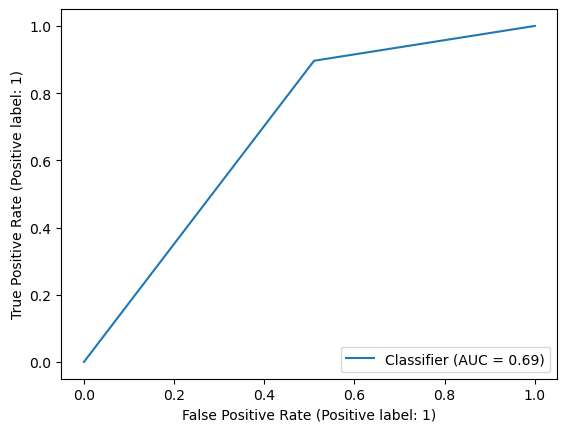

In [78]:
RocCurveDisplay.from_predictions(y_train,rf_model.predict(x_train))

# GradientBoostingClassifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
gbm=GradientBoostingClassifier(n_estimators=5000)

In [81]:
gbmmodel=gbm.fit(x_train,y_train)

In [82]:
gbmmodel.score(x_train,y_train)

0.9276864158594278

In [83]:
gbm_test_pred=gbmmodel.predict(x_test)

In [84]:
pd.crosstab(y_test,gbm_test_pred)

col_0,0,1
row_0,,
0,1137,512
1,427,1730


In [85]:
log_pred=logitmodel.predict(x_test)
nb_pred=nb_model.predict(x_test)
dt_pred=dt_model.predict(x_test)
rf_pred=rf_model.predict(x_test)
gb_pred=gbmmodel.predict(x_test)

In [86]:
pred=[log_pred,nb_pred,dt_pred,rf_pred,gb_pred]

In [87]:
al=[logit,nb,dt,rf,gbm]

In [88]:
model=[logitmodel,nb_model,dt_model,rf_model,gbmmodel]

In [89]:
j=0
for i in model:
    print((i.score(x_train,y_train)))

0.6947510700608245
0.6637756251407975
0.7081549898625816
0.7211083577382293
0.9276864158594278


In [90]:
print('Logistic Regresssion')
print(classification_report(y_test,log_pred))
print('Naive Bayes')
print(classification_report(y_test,nb_pred))
print('Decision Tree')
print(classification_report(y_test,dt_pred))
print('Random Forest')
print(classification_report(y_test,rf_pred))
print('Gradient Boosting')
print(classification_report(y_test,gb_pred))

Logistic Regresssion
              precision    recall  f1-score   support

           0       0.66      0.57      0.61      1649
           1       0.70      0.78      0.74      2157

    accuracy                           0.69      3806
   macro avg       0.68      0.67      0.68      3806
weighted avg       0.69      0.69      0.68      3806

Naive Bayes
              precision    recall  f1-score   support

           0       0.61      0.56      0.59      1649
           1       0.68      0.73      0.71      2157

    accuracy                           0.66      3806
   macro avg       0.65      0.64      0.65      3806
weighted avg       0.65      0.66      0.65      3806

Decision Tree
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1649
           1       0.73      0.73      0.73      2157

    accuracy                           0.70      3806
   macro avg       0.69      0.69      0.69      3806
weighted avg       0.70    

# SVC

In [91]:
from sklearn.svm import SVC

In [92]:
clf=SVC()

In [93]:
clfmodel=clf.fit(x_train,y_train)

In [94]:
clfmodel.intercept_

array([0.22585223])

In [95]:
clfmodel.support_vectors_

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [96]:
clfmodel.score(x_train,y_train)

0.8183149357963505

# Conclusion 

Here is the Conlcusion of the "INVECHICLE COUPON Project", After creating the Linear Regression,Decision Tree,
Random Forest,Gradient Boosting and SVM models the best fit model is "GRADIENT BOOSTING".